<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/SBERT_CROSS_ENCODER_for_Zero_Shot_Classification%2C_Question_%26_Answer_(QA)%2C_Update_2022_(SBERT_27).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers -q

In [ ]:
!pip install sentence-transformers -q

In [ ]:
from sentence_transformers import CrossEncoder
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
document = """Europe is a large peninsula[10] conventionally considered a continent in its own right because of its great physical size and the weight of its history and traditions. Europe is also considered a subcontinent of Eurasia and it is located entirely in the Northern Hemisphere and mostly in the Eastern Hemisphere. Comprising the westernmost peninsulas of Eurasia,[11] it shares the continental landmass of Afro-Eurasia with both Africa and Asia. It is bordered by the Arctic Ocean to the north, the Atlantic Ocean to the west, the Mediterranean Sea to the south and Asia to the east. Europe is commonly considered to be separated from Asia by the watershed of the Ural Mountains, the Ural River, the Caspian Sea, the Greater Caucasus, the Black Sea and the waterways of the Turkish Straits.[12]

Europe covers about 10.18 million km2 (3.93 million sq mi), or 2% of Earth's surface (6.8% of land area), making it the second-smallest continent (using the seven-continent model). Politically, Europe is divided into about fifty sovereign states, of which Russia is the largest and most populous, spanning 39% of the continent and comprising 15% of its population. Europe had a total population of about 745 million (about 10% of the world population) in 2021.[2][3] The European climate is largely affected by warm Atlantic currents that temper winters and summers on much of the continent, even at latitudes along which the climate in Asia and North America is severe. Further from the sea, seasonal differences are more noticeable than close to the coast.European culture is the root of Western civilisation, which traces its lineage back to ancient Greece and ancient Rome.[13][14] The fall of the Western Roman Empire in 476 AD and the subsequent Migration Period marked the end of Europe's ancient history, and the beginning of the Middle Ages. Renaissance humanism, exploration, art, and science led to the modern era. Since the Age of Discovery, started by Portugal and Spain, Europe played a predominant role in global affairs. Between the 16th and 20th centuries, European powers colonised at various times the Americas, almost all of Africa and Oceania, and the majority of Asia.

The Age of Enlightenment, the subsequent French Revolution and the Napoleonic Wars shaped the continent culturally, politically and economically from the end of the 17th century until the first half of the 19th century. The Industrial Revolution, which began in Great Britain at the end of the 18th century, gave rise to radical economic, cultural and social change in Western Europe and eventually the wider world. Both world wars took place for the most part in Europe, contributing to a decline in Western European dominance in world affairs by the mid-20th century as the Soviet Union and the United States took prominence.[15] During the Cold War, Europe was divided along the Iron Curtain between NATO in the West and the Warsaw Pact in the East, until the Revolutions of 1989, Fall of the Berlin Wall and the Dissolution of the Soviet Union.

In 1949, the Council of Europe was founded with the idea of unifying Europe[16] to achieve common goals and prevent future wars. Further European integration by some states led to the formation of the European Union (EU), a separate political entity that lies between a confederation and a federation.[17] The EU originated in Western Europe but has been expanding eastward since the fall of the Soviet Union in 1991. The currency of most countries of the European Union, the euro, is the most commonly used among Europeans; and the EU's Schengen Area abolishes border and immigration controls between most of its member states, and some non-member states. There exists a political movement favouring the evolution of the European Union into a single federation encompassing much of the continent."""

In [ ]:
document

"Europe is a large peninsula[10] conventionally considered a continent in its own right because of its great physical size and the weight of its history and traditions. Europe is also considered a subcontinent of Eurasia and it is located entirely in the Northern Hemisphere and mostly in the Eastern Hemisphere. Comprising the westernmost peninsulas of Eurasia,[11] it shares the continental landmass of Afro-Eurasia with both Africa and Asia. It is bordered by the Arctic Ocean to the north, the Atlantic Ocean to the west, the Mediterranean Sea to the south and Asia to the east. Europe is commonly considered to be separated from Asia by the watershed of the Ural Mountains, the Ural River, the Caspian Sea, the Greater Caucasus, the Black Sea and the waterways of the Turkish Straits.[12]\n\nEurope covers about 10.18 million km2 (3.93 million sq mi), or 2% of Earth's surface (6.8% of land area), making it the second-smallest continent (using the seven-continent model). Politically, Europe is

In [ ]:
#split the article into paragraphs and then paragraph into sentences
paragraphs = []
for paragraph in document.replace("\r\n","\n").split("\n\n"):
  if len(paragraph.strip())> 0:
    paragraphs.append(sent_tokenize(paragraph.strip()))

In [ ]:
paragraphs

[['Europe is a large peninsula[10] conventionally considered a continent in its own right because of its great physical size and the weight of its history and traditions.',
  'Europe is also considered a subcontinent of Eurasia and it is located entirely in the Northern Hemisphere and mostly in the Eastern Hemisphere.',
  'Comprising the westernmost peninsulas of Eurasia,[11] it shares the continental landmass of Afro-Eurasia with both Africa and Asia.',
  'It is bordered by the Arctic Ocean to the north, the Atlantic Ocean to the west, the Mediterranean Sea to the south and Asia to the east.',
  'Europe is commonly considered to be separated from Asia by the watershed of the Ural Mountains, the Ural River, the Caspian Sea, the Greater Caucasus, the Black Sea and the waterways of the Turkish Straits.',
  '[12]'],
 ["Europe covers about 10.18 million km2 (3.93 million sq mi), or 2% of Earth's surface (6.8% of land area), making it the second-smallest continent (using the seven-continent

In [ ]:
#combine upto 3 sentences
window_size = 3
passages = []
for paragraph in paragraphs:
  for start_idx in range(0,len(paragraph),window_size):
    end_idx = min(start_idx + window_size,len(paragraph))
    passages.append(" ".join(paragraph[start_idx:end_idx]))

In [ ]:
print(f"Paragraphs : {len(paragraphs)}")
print(f"Sentences : {sum([len(p) for p in paragraphs])}")
print(f"Passages : {len(passages)}")

Paragraphs : 4
Sentences : 24
Passages : 9


In [ ]:
model = CrossEncoder('cross-encoder/ms-marco-TinyBERT-L-2')

In [ ]:
queries = ['How large is Europe?','Is Europe a continent?',
           'What is the currency in EU?',
           'Is Europa in Southern part of the globe?']

In [ ]:
import time
for query in queries:
  start_time = time.time()
  model_inputs = [(query,passage) for passage in passages]
  scores = model.predict(model_inputs)
  results = [{'input':inp,'score':score} for inp,score in zip(model_inputs,scores)]
  results = sorted(results,key=lambda x:x['score'],reverse=True)
  print(f"query :{query}")
  print(f"search took {time.time() - start_time:.2f} seconds")
  for hit in results[:5]:
    print(f"Score : {hit['score']} \t {hit['input'][1]}")

query :How large is Europe?
search took 0.02 seconds
Score : 0.9298860430717468 	 Europe is a large peninsula[10] conventionally considered a continent in its own right because of its great physical size and the weight of its history and traditions. Europe is also considered a subcontinent of Eurasia and it is located entirely in the Northern Hemisphere and mostly in the Eastern Hemisphere. Comprising the westernmost peninsulas of Eurasia,[11] it shares the continental landmass of Afro-Eurasia with both Africa and Asia.
Score : 0.8595547676086426 	 Europe covers about 10.18 million km2 (3.93 million sq mi), or 2% of Earth's surface (6.8% of land area), making it the second-smallest continent (using the seven-continent model). Politically, Europe is divided into about fifty sovereign states, of which Russia is the largest and most populous, spanning 39% of the continent and comprising 15% of its population. Europe had a total population of about 745 million (about 10% of the world popul

##Zero Shot Classification

In [ ]:
from transformers import pipeline
classifier = pipeline('zero-shot-classification',model='cross-encoder/nli-deberta-base')

In [ ]:
Sent = "Apple just announced the launch of new Iphone 14"
candidate_labels = ["technology","religion","politics","phone","tablet","computer"]
res = classifier(Sent,candidate_labels)
print(res['scores'])

[0.3875018358230591, 0.33420780301094055, 0.18164317309856415, 0.09369932115077972, 0.001764314598403871, 0.0011835464974865317]


In [ ]:
print(res['labels'])

['technology', 'phone', 'computer', 'tablet', 'religion', 'politics']


In [ ]:
sent1 = "Jupiter is the smallest planet in our solar system"
candidate_labels = ["sports","politics","alchemy","science","astrology"]
res = classifier(Sent,candidate_labels)
for label,score in zip(res['labels'],res['scores']):
  print(f"{label}:{score}")

sports:0.24760444462299347
science:0.2462552934885025
alchemy:0.22898611426353455
astrology:0.17707271873950958
politics:0.10008139908313751


## Same model for sentence pair similarity

In [ ]:
from sentence_transformers import CrossEncoder
model = CrossEncoder('cross-encoder/nli-deberta-base')

In [ ]:
scores = model.predict([('A man is eating pizza','A man eats something')])

In [ ]:
scores

array([[-4.4271946 ,  3.096611  ,  0.50673735]], dtype=float32)

In [ ]:
#convert scores to labels
labels = ['contradiction','entailment','neutral']
label = [labels[score] for score in scores.argmax(axis=1)]
label

['entailment']

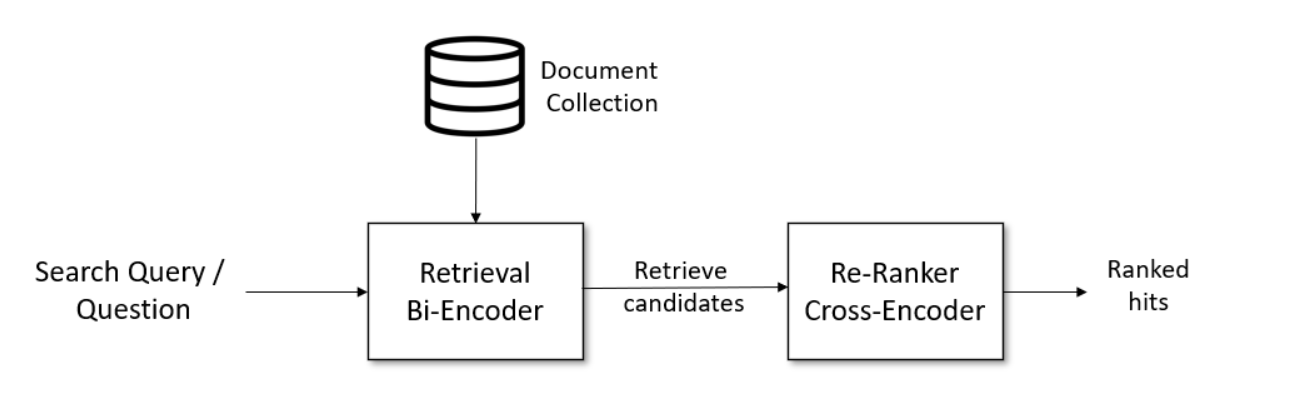

## Advanced Semantic SEARCH w/ SBERT (Re-Ranking w/ Cross-Encoder) Edition 2022 #sbert (SBERT 28)
* How to perform reranking with a cross-encoder for semantic search

In [ ]:
from sentence_transformers import SentenceTransformer, util
from sentence_transformers import CrossEncoder
import os
import csv
import pickle
import time
import sys

##BiEncoder

In [ ]:
# We use a BiEncoder (SentenceTransformer) that produces embeddings for questions.
# We then search for similar questions using cosine similarity and identify the top 100 most similar questions
model_name = 'all-MiniLM-L6-v2'
model = SentenceTransformer(model_name)
num_candidates = 500

##Cross-Encoder

In [ ]:
# To refine the results, we use a CrossEncoder. 
#A CrossEncoder gets both inputs (input_question, retrieved_question)
# and outputs a score 0...1 indicating the similarity.
cross_encoder_model = CrossEncoder('cross-encoder/stsb-roberta-base')

##Dataset

In [ ]:
# Dataset we want to use
url = "http://qim.fs.quoracdn.net/quora_duplicate_questions.tsv"
dataset_path = "quora_duplicate_questions.tsv"
max_corpus_size = 20000

In [ ]:
# Some local file to cache computed embeddings
embedding_cache_path = 'quora-embeddings-{}-size-{}.pkl'.format(model_name.replace('/', '_'), max_corpus_size)

In [ ]:
embedding_cache_path 

'quora-embeddings-all-MiniLM-L6-v2-size-20000.pkl'

* Cross-Encoders have their own evaluation function : sentence_transformers.cross_encoder.evaluation

In [ ]:
import pandas as pd
#Check if embedding cache path exists
if not os.path.exists(embedding_cache_path):
  # Check if the dataset exists. If not, download and extract
  # Download dataset if needed
  if not os.path.exists(dataset_path):
    print("Download dataset")
    util.http_get(url, dataset_path)
  # Get all unique sentences from the file
  corpus_sentences = set()
  df = pd.read_csv(dataset_path,sep = '\t')
  df = df.head(max_corpus_size)
  print(df.head())
  quest1 = list(df['question1'])
  quest2 = list(df['question2'])
  for q1,q2 in zip(quest1,quest2):
    corpus_sentences.add(q1)
    corpus_sentences.add(q2)
  corpus_sentences = list(corpus_sentences)
  print("Encode the corpus. This might take a while")
  corpus_embeddings = model.encode(corpus_sentences, show_progress_bar=True, convert_to_tensor=True)
  #
  print("Store file on disc")
  with open(embedding_cache_path, "wb") as fOut:
    pickle.dump({'sentences': corpus_sentences, 'embeddings': corpus_embeddings}, fOut)
else:
    print("Load pre-computed embeddings from disc")
    with open(embedding_cache_path, "rb") as fIn:
        cache_data = pickle.load(fIn)
        corpus_sentences = cache_data['sentences'][0:max_corpus_size]
        corpus_embeddings = cache_data['embeddings'][0:max_corpus_size]

###############################
print("Corpus loaded with {} sentences / embeddings".format(len(corpus_sentences)))

Load pre-computed embeddings from disc
Corpus loaded with 20000 sentences / embeddings


In [ ]:
option = 'yes'
while option == 'yes':
    inp_question = input("Please enter a question: ")
    print("Input question:", inp_question)

    #First, retrieve candidates using cosine similarity search
    start_time = time.time()
    #bi-encoder
    question_embedding = model.encode(inp_question, convert_to_tensor=True)
    hits = util.semantic_search(question_embedding, corpus_embeddings, top_k=num_candidates)
    hits = hits[0]  #Get the hits for the first query

    print("Cosine-Similarity search took {:.3f} seconds".format(time.time()-start_time))
    print("Top 5 hits with cosine-similarity:")
    for hit in hits[0:5]:
        print("\t{:.3f}\t{}".format(hit['score'], corpus_sentences[hit['corpus_id']]))


    #Now, do the re-ranking with the cross-encoder
    start_time = time.time()
    sentence_pairs = [[inp_question, corpus_sentences[hit['corpus_id']]] for hit in hits]
    #cross-encoder to predict the sentence pair similarity score
    ce_scores = cross_encoder_model.predict(sentence_pairs)

    for idx in range(len(hits)):
        hits[idx]['cross-encoder_score'] = ce_scores[idx]

    #Sort list by CrossEncoder scores
    hits = sorted(hits, key=lambda x: x['cross-encoder_score'], reverse=True)
    print("\nRe-ranking with Cross-Encoder took {:.3f} seconds".format(time.time() - start_time))
    print("Top 5 hits with CrossEncoder:")
    for hit in hits[0:5]:
        print("\t{:.3f}\t{}".format(hit['cross-encoder_score'], corpus_sentences[hit['corpus_id']]))

    print("\n\n========\n")
    option = input("Do you want to continue? (yes/no)")

Please enter a question: What is kohinoor?
Input question: What is kohinoor?
Cosine-Similarity search took 0.041 seconds
Top 5 hits with cosine-similarity:
	0.629	What is the story of Kohinoor (Koh-i-Noor) Diamond?
	0.612	What is the meaning of Marathi word 'Kombdi'?
	0.544	What is www.Konstruktor.com?
	0.536	Who was Koundinya Rishi?
	0.492	What is the english word for 'kharta'?

Re-ranking with Cross-Encoder took 1.303 seconds
Top 5 hits with CrossEncoder:
	0.680	What is the story of Kohinoor (Koh-i-Noor) Diamond?
	0.388	What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?
	0.324	What are the best Korean drama romances?
	0.295	Why can't India get its Kohinoor diamond back?
	0.280	What is origin of Hindu?



Do you want to continue? (yes/no)no


## SBERT DOMAIN AUGMENTATION - How to Transfer Domain Knowledge w/ Augmented SBERT

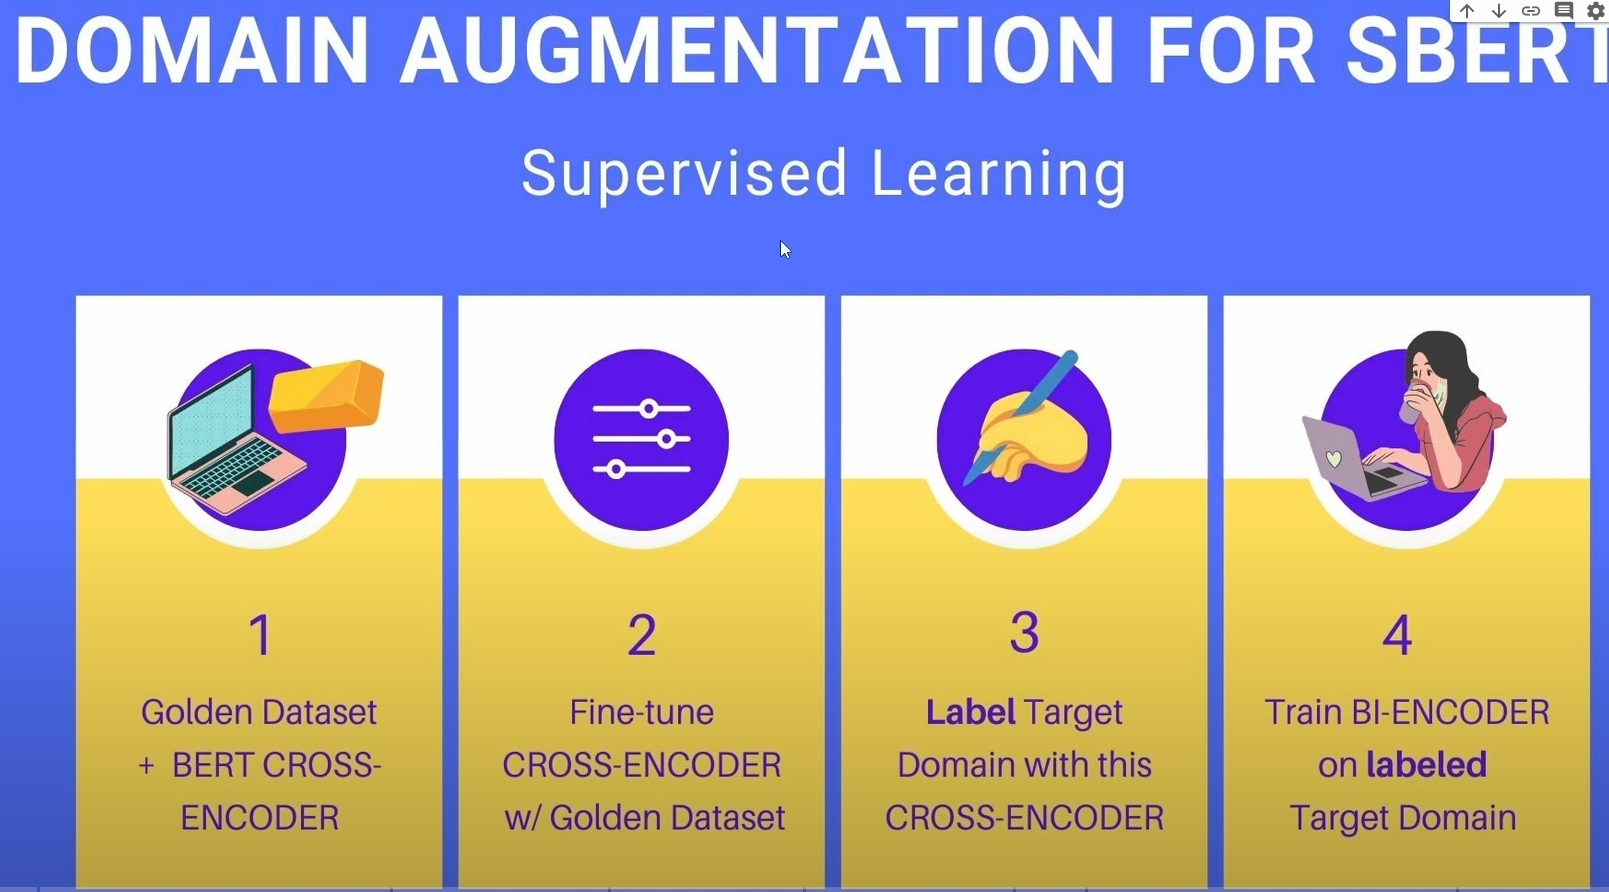

* SBERT model ranked on our target domain to retrive good results

In [ ]:
import torch
torch.__version__

'1.13.0+cu116'

## Train Augmented SBERT model

#### Methodology:

Three steps are followed for AugSBERT data-augmentation strategy with Domain Trasfer / Cross-Domain - 
1. Cross-Encoder aka BERT is trained over STSb (source) dataset.
2. Cross-Encoder is used to label QQP training (target) dataset (Assume no labels/no annotations are provided).
3. Bi-encoder aka SBERT is trained over the labeled QQP (target) dataset.


In [ ]:
from torch.utils.data import DataLoader
from sentence_transformers import models, losses, util, LoggingHandler, SentenceTransformer
from sentence_transformers.cross_encoder import CrossEncoder
from sentence_transformers.cross_encoder.evaluation import CECorrelationEvaluator
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator, BinaryClassificationEvaluator
from sentence_transformers.readers import InputExample
from datetime import datetime
from zipfile import ZipFile
import logging
import csv
import sys
import torch
import math
import gzip
import os

In [ ]:
## Debug information to stdout
logging.basicConfig(format='%(asctime)s - %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO,
                    handlers=[LoggingHandler()])

In [ ]:
#You can specify any huggingface/transformers pre-trained model here, for example, bert-base-uncased, roberta-base, xlm-roberta-base
model_name = 'bert-base-uncased'
batch_size = 16
num_epochs = 2
max_seq_length = 128
use_cuda = torch.cuda.is_available()

In [ ]:
###### Read Datasets ######
sts_dataset_path = 'datasets/stsbenchmark.tsv.gz' #sts bench mark dataset
qqp_dataset_path = 'quora-IR-dataset' # Quora question pair dataset

In [ ]:
# Check if the STSb dataset exsist. If not, download and extract it
if not os.path.exists(sts_dataset_path):
    util.http_get('https://sbert.net/datasets/stsbenchmark.tsv.gz', sts_dataset_path)


# Check if the QQP dataset exists. If not, download and extract
if not os.path.exists(qqp_dataset_path):
    logging.info("Dataset not found. Download")
    zip_save_path = 'quora-IR-dataset.zip'
    util.http_get(url='https://sbert.net/datasets/quora-IR-dataset.zip', path=zip_save_path)
    with ZipFile(zip_save_path, 'r') as zipIn:
        zipIn.extractall(qqp_dataset_path)

## Path variables

In [ ]:
cross_encoder_path = 'output/cross-encoder/stsb_indomain_'+model_name.replace("/", "-")+'-'+datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
bi_encoder_path = 'output/bi-encoder/qqp_cross_domain_'+model_name.replace("/", "-")+'-'+datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [ ]:
cross_encoder_path

'output/cross-encoder/stsb_indomain_bert-base-uncased-2023-01-13_08-32-32'

In [ ]:
print(model_name)
print(cross_encoder_path)
print(bi_encoder_path)
print(max_seq_length)

bert-base-uncased
output/cross-encoder/stsb_indomain_bert-base-uncased-2023-01-13_08-32-32
output/bi-encoder/qqp_cross_domain_bert-base-uncased-2023-01-13_08-32-32
128


* STSB Dataset : Semantic Textual Similarity Dataset is a collection of data pairs drawn from news headlines,video and image captions and natural language inference data.Each pair is human annotated similarity scorebetween 0 and 5

* QQP dataset : Quora Question Pair2 dataset is a collection of question pairs from the community question answerring website Quora.The task is to determine whether a pair of questions are semantically equivalent.

The Cross-Encoder is a wrapper Huggingface AutoModelForSequenceClassification but with some methods to make training and predicting scores a lit bit easier

The saved models are 100% compatible with huggingface and can also be loaded with their classes.

In [ ]:
###### Cross-encoder (simpletransformers) ######

logging.info("Loading cross-encoder model: {}".format(model_name))
# Use Huggingface/transformers model (like BERT, RoBERTa, XLNet, XLM-R) for cross-encoder model
cross_encoder = CrossEncoder(model_name, num_labels=1)
# Then we define the base model and number of labels
# we can take any huggingface pretrained model that is compatible with AutoModel
#Use from_pretrained() to load model weights


# for binary tasks and task with continuous scores like STS(Sentence Textual Similarity) we set num_labels=1
#for classification tasks we set it to number of labels we have

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
###### Bi-encoder (sentence-transformers) ######

logging.info("Loading bi-encoder model: {}".format(model_name))

# Use Huggingface/transformers model (like BERT, RoBERTa, XLNet, XLM-R) for mapping tokens to embeddings
word_embedding_model = models.Transformer(model_name, max_seq_length=max_seq_length)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Apply mean pooling to get one fixed sized sentence vector
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(),
                               pooling_mode_mean_tokens=True,
                               pooling_mode_cls_token=False,
                               pooling_mode_max_tokens=False)

In [ ]:
bi_encoder = SentenceTransformer(modules=[word_embedding_model, pooling_model])

## We have the cross encoder and bi encoder defined

In [ ]:
cross_encoder

In [ ]:
bi_encoder

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

## What we do with cross encoder now ?

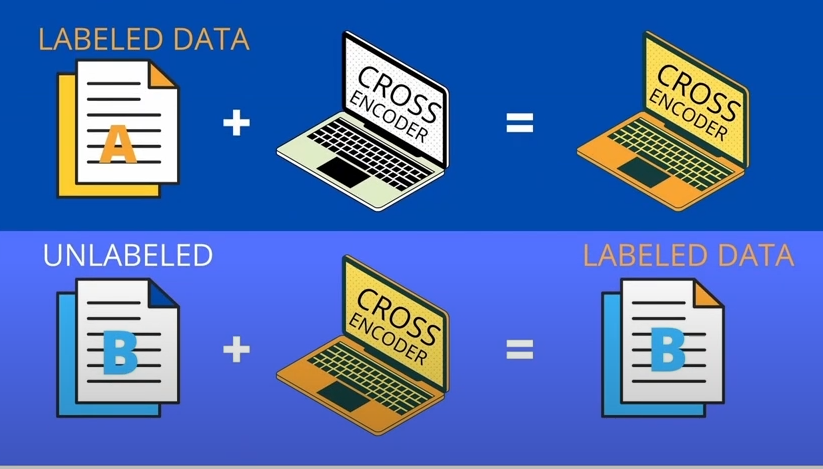

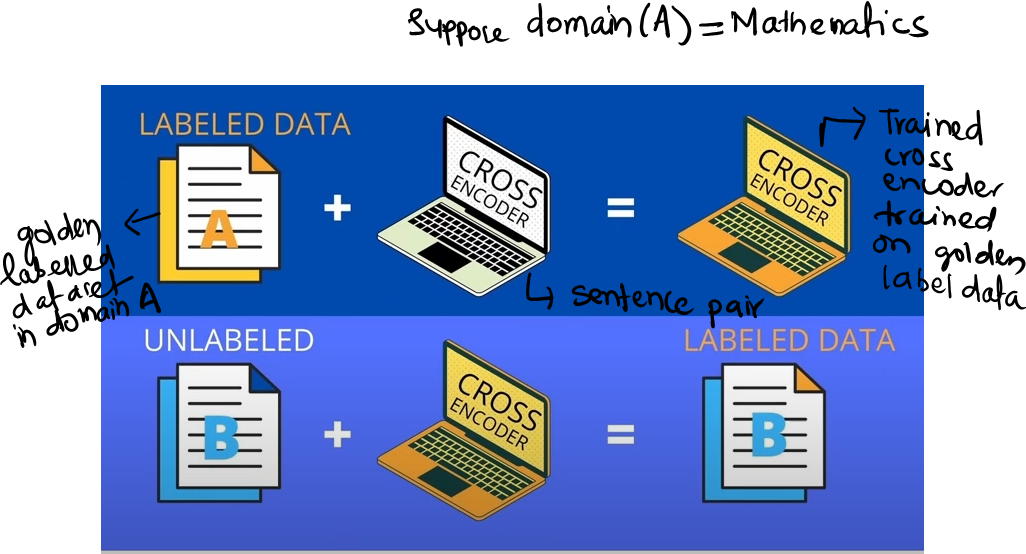

In [ ]:
#####################################################
#
# Step 1: Train cross-encoder model with STSbenchmark (Golden Dataset A)
#
#####################################################

logging.info("Step 1: Train cross-encoder: {} with STSbenchmark (source dataset)".format(model_name))

gold_samples = []
dev_samples = []
test_samples = []

In [ ]:
sts_dataset_path

'datasets/stsbenchmark.tsv.gz'

* Download STS benchmark data set

* from sentence_transformers.readers import InputExample

In [ ]:
with gzip.open(sts_dataset_path, 'rt', encoding='utf8') as fIn:
    reader = csv.DictReader(fIn, delimiter='\t', quoting=csv.QUOTE_NONE)
    for row in reader:
        score = float(row['score']) / 5.0  # Normalize score to range 0 ... 1

        if row['split'] == 'dev':
            dev_samples.append(InputExample(texts=[row['sentence1'], row['sentence2']], label=score))
        elif row['split'] == 'test':
            test_samples.append(InputExample(texts=[row['sentence1'], row['sentence2']], label=score))
        else:
            #As we want to get symmetric scores, i.e. CrossEncoder(A,B) = CrossEncoder(B,A), we pass both combinations to the train set
            gold_samples.append(InputExample(texts=[row['sentence1'], row['sentence2']], label=score))
            gold_samples.append(InputExample(texts=[row['sentence2'], row['sentence1']], label=score))


In [ ]:
print(len(gold_samples))
print(len(dev_samples))
print(test_samples)

11498
1500
[<sentence_transformers.readers.InputExample.InputExample object at 0x7f70df704a30>, <sentence_transformers.readers.InputExample.InputExample object at 0x7f70df704a90>, <sentence_transformers.readers.InputExample.InputExample object at 0x7f70df704af0>, <sentence_transformers.readers.InputExample.InputExample object at 0x7f70df704b50>, <sentence_transformers.readers.InputExample.InputExample object at 0x7f70df704bb0>, <sentence_transformers.readers.InputExample.InputExample object at 0x7f70df704c10>, <sentence_transformers.readers.InputExample.InputExample object at 0x7f70df704c70>, <sentence_transformers.readers.InputExample.InputExample object at 0x7f70df704cd0>, <sentence_transformers.readers.InputExample.InputExample object at 0x7f70df704d30>, <sentence_transformers.readers.InputExample.InputExample object at 0x7f70df704d90>, <sentence_transformers.readers.InputExample.InputExample object at 0x7f70df704df0>, <sentence_transformers.readers.InputExample.InputExample object 

## Download .gz file into a dataframe

In [ ]:
df = pd.read_csv(sts_dataset_path,compression='gzip',sep='\t',header=0,error_bad_lines=False,quotechar='"', engine="python")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 2003: '	' expected after '"'
Skipping line 2034: '	' expected after '"'
Skipping line 2069: '	' expected after '"'
Skipping line 2077: '	' expected after '"'
Skipping line 2091: '	' expected after '"'
Skipping line 2094: '	' expected after '"'
Skipping line 2121: '	' expected after '"'
Skipping line 2124: '	' expected after '"'
Skipping line 2295: '	' expected after '"'
Skipping line 2470: '	' expected after '"'
Skipping line 2476: '	' expected after '"'
Skipping line 2485: '	' expected after '"'
Skipping line 2509: '	' expected after '"'
Skipping line 2524: '	' expected after '"'
Skipping line 2525: '	' expected after '"'
Skipping line 2531: '	' expected after '"'
Skipping line 2551: '	' expected after '"'
Skipping line 2553: '	' expected

In [ ]:
df.head()

split          genre dataset      year  sid  score  \
0  train  main-captions  MSRvid  2012test    1   5.00   
1  train  main-captions  MSRvid  2012test    4   3.80   
2  train  main-captions  MSRvid  2012test    5   3.80   
3  train  main-captions  MSRvid  2012test    6   2.60   
4  train  main-captions  MSRvid  2012test    9   4.25   

                                       sentence1  \
0                         A plane is taking off.   
1                A man is playing a large flute.   
2  A man is spreading shreded cheese on a pizza.   
3                   Three men are playing chess.   
4                    A man is playing the cello.   

                                           sentence2  
0                        An air plane is taking off.  
1                          A man is playing a flute.  
2  A man is spreading shredded cheese on an uncoo...  
3                         Two men are playing chess.  
4                 A man seated is playing the cello.

In [ ]:
df['split'].unique()

array(['train', 'dev', 'test'], dtype=object)

In [ ]:
# We wrap gold_samples (which is a List[InputExample]) into a pytorch DataLoader
train_dataloader = DataLoader(gold_samples, shuffle=True, batch_size=batch_size)


# We add an evaluator, which evaluates the performance during training
evaluator = CECorrelationEvaluator.from_input_examples(dev_samples, name='sts-dev')

In [ ]:
evaluator

* **Warmup steps** are just a few updates with low learning rate before / at the beginning of training. 
* After this warmup, we use the regular learning rate (schedule) to train your model to convergence.

In [ ]:
# Configure the training
warmup_steps = math.ceil(len(train_dataloader) * num_epochs * 0.1) #10% of train data for warm-up
logging.info("Warmup-steps: {}".format(warmup_steps))

# Train the cross-encoder model(golden data cross encoder)
cross_encoder.fit(train_dataloader=train_dataloader,
          evaluator=evaluator,
          epochs=num_epochs,
          evaluation_steps=1000,
          warmup_steps=warmup_steps,
          output_path=cross_encoder_path)

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/719 [00:00<?, ?it/s]

Iteration:   0%|          | 0/719 [00:00<?, ?it/s]

In [129]:
# the trained cross encoder model is stored at the path below
cross_encoder_path

'output/cross-encoder/stsb_indomain_bert-base-uncased-2023-01-13_08-32-32'

## Visualize golden sample data

In [130]:
for x in gold_samples[:5]:
  print(x.texts,x.label)

['A plane is taking off.', 'An air plane is taking off.'] 1.0
['An air plane is taking off.', 'A plane is taking off.'] 1.0
['A man is playing a large flute.', 'A man is playing a flute.'] 0.76
['A man is playing a flute.', 'A man is playing a large flute.'] 0.76
['A man is spreading shreded cheese on a pizza.', 'A man is spreading shredded cheese on an uncooked pizza.'] 0.76


## Genereate more trainig data

* Take more training data from domain B, here the cross encoder will label our dataset


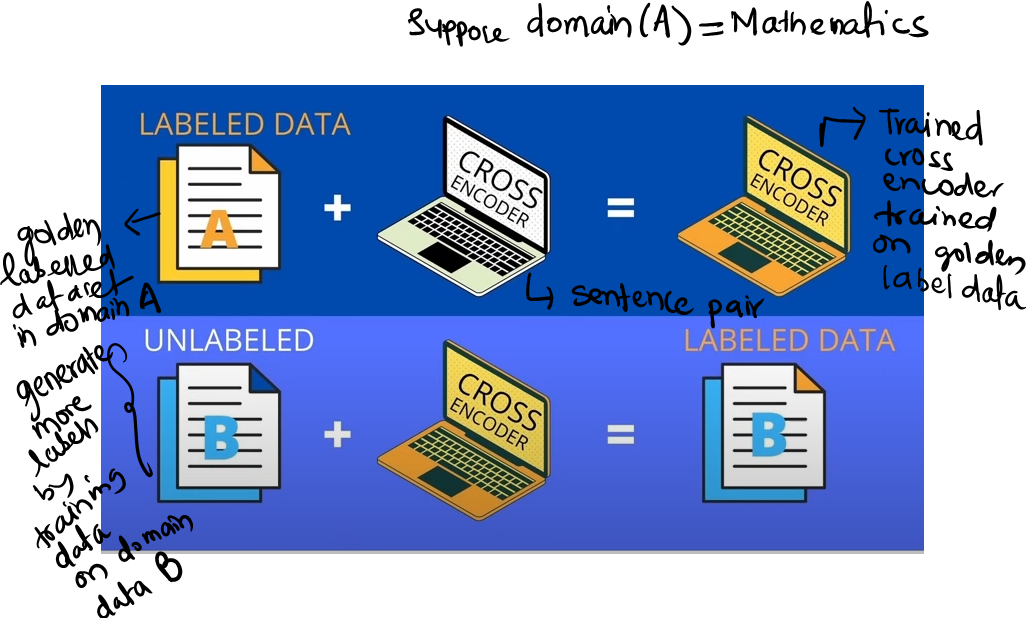

A cross encoder works best below 10000 sentences 

In [ ]:
##################################################################
#
# Step 2: Label QQP train dataset(a different domain) using trained cross-encoder (BERT) model
#
##################################################################

logging.info("Step 2: Label QQP (target dataset) with cross-encoder: {}".format(model_name))

cross_encoder = CrossEncoder(cross_encoder_path)

silver_data = []

with open(os.path.join(qqp_dataset_path, "classification/train_pairs.tsv"), encoding='utf8') as fIn:
    reader = csv.DictReader(fIn, delimiter='\t', quoting=csv.QUOTE_NONE)
    for row in reader:
        if row['is_duplicate'] == '1':
            silver_data.append([row['question1'], row['question2']])
#predict the label(similarity sores)
silver_scores = cross_encoder.predict(silver_data)

# All model predictions should be between [0,1]
assert all(0.0 <= score <= 1.0 for score in silver_scores)

binary_silver_scores = [1 if score >= 0.5 else 0 for score in silver_scores]

* after step 2 we have labeled data for domain b

* the step 2 domain transfer will not not work if we do not have some correlation between domain A and Domain B 
* for example domain A: Mathematics domain B: Physics
* If the vocabulary between domain A and B are completely distinct then the Domain Transfer method will not work

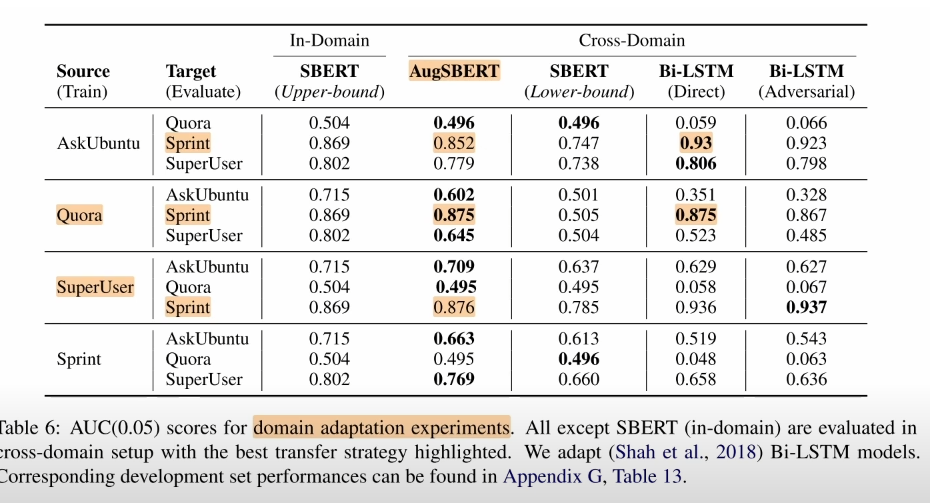

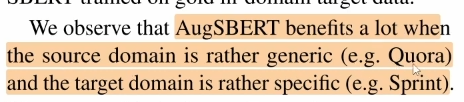

#### What would we do with a Bi-Encoder now that we have a huge dataset ?

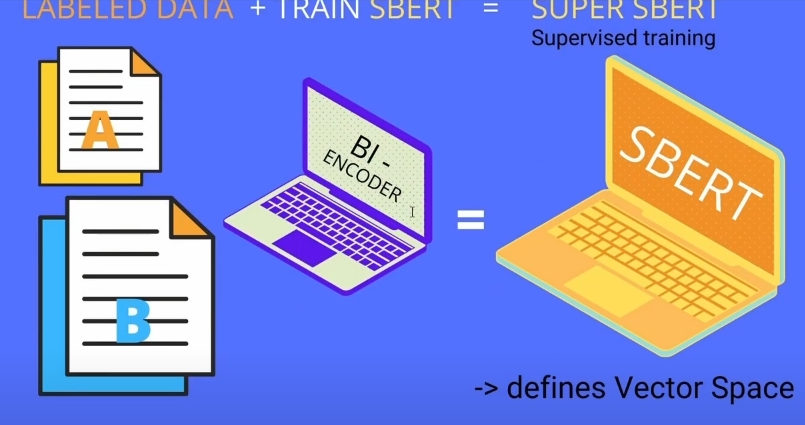

In [ ]:
###########################################################################
#
# Step 3: Train bi-encoder (SBERT) model with re-labelled QQP dataset - Augmented SBERT
# Here we use knowledge of Domain A with overlapping of domain B and use the labels predicted
# for domain B as the label to train the bi-encoder
#
###########################################################################

logging.info("Step 3: Train bi-encoder: {} over labeled QQP (target dataset)".format(model_name))

# Convert the dataset to a DataLoader ready for training
logging.info("Loading BERT labeled QQP dataset")
qqp_train_data = list(InputExample(texts=[data[0], data[1]], label=score) for (data, score) in zip(silver_data, binary_silver_scores))


train_dataloader = DataLoader(qqp_train_data, shuffle=True, batch_size=batch_size)
train_loss = losses.MultipleNegativesRankingLoss(bi_encoder)

In [131]:
train_loss

MultipleNegativesRankingLoss(
  (model): SentenceTransformer(
    (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
    (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  )
  (cross_entropy_loss): CrossEntropyLoss()
)

### BinaryClassification Evaluator

Evaluate a model based on the similarity of the embeddings by calculating the accuracy of identifyig the similar and dissimilar sentences.

#### Metrc used
* cosine Similarity
* manhattan distance

Returned score is the accuracy with a specified metric.

The results are written into a .csv file.If a .csv file exists then values will be appended.

**Result is 0: disimilar pairs 1: similar pairs**

#### Parameters
* sentence1 - first column of sentences
* sentence2 - second column of sentences
* labels - label[i] for the sentence pair
* name - name for output
* batch_size
* show_progress_bar
* write_csv




In [127]:
###### Classification ######
# Given (quesiton1, question2), is this a duplicate or not?
# The evaluator will compute the embeddings for both questions and then compute
# a cosine similarity. If the similarity is above a threshold, we have a duplicate.
logging.info("Read QQP dev dataset")

dev_sentences1 = []
dev_sentences2 = []
dev_labels = []

with open(os.path.join(qqp_dataset_path, "classification/dev_pairs.tsv"), encoding='utf8') as fIn:
    reader = csv.DictReader(fIn, delimiter='\t', quoting=csv.QUOTE_NONE)
    for row in reader:
        dev_sentences1.append(row['question1'])
        dev_sentences2.append(row['question2'])
        dev_labels.append(int(row['is_duplicate']))

evaluator = BinaryClassificationEvaluator(dev_sentences1, dev_sentences2, dev_labels)

# Configure the training.
warmup_steps = math.ceil(len(train_dataloader) * num_epochs * 0.1) #10% of train data for warm-up
logging.info("Warmup-steps: {}".format(warmup_steps))

# Train the bi-encoder model
bi_encoder.fit(train_objectives=[(train_dataloader, train_loss)],
          evaluator=evaluator,
          epochs=num_epochs,
          evaluation_steps=1000,
          warmup_steps=warmup_steps,
          output_path=bi_encoder_path
          )

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/6479 [00:00<?, ?it/s]

Iteration:   0%|          | 0/6479 [00:00<?, ?it/s]

In [134]:
bi_encoder_path

'output/bi-encoder/qqp_cross_domain_bert-base-uncased-2023-01-13_08-32-32'

In [128]:
###############################################################
#
# Evaluate Augmented SBERT performance on QQP benchmark dataset
#
###############################################################

# Loading the augmented sbert model 
bi_encoder = SentenceTransformer(bi_encoder_path)

logging.info("Read QQP test dataset")
test_sentences1 = []
test_sentences2 = []
test_labels = []

with open(os.path.join(qqp_dataset_path, "classification/test_pairs.tsv"), encoding='utf8') as fIn:
    reader = csv.DictReader(fIn, delimiter='\t', quoting=csv.QUOTE_NONE)
    for row in reader:
        test_sentences1.append(row['question1'])
        test_sentences2.append(row['question2'])
        test_labels.append(int(row['is_duplicate']))

evaluator = BinaryClassificationEvaluator(test_sentences1, test_sentences2, test_labels)
bi_encoder.evaluate(evaluator)

0.7399670742007205

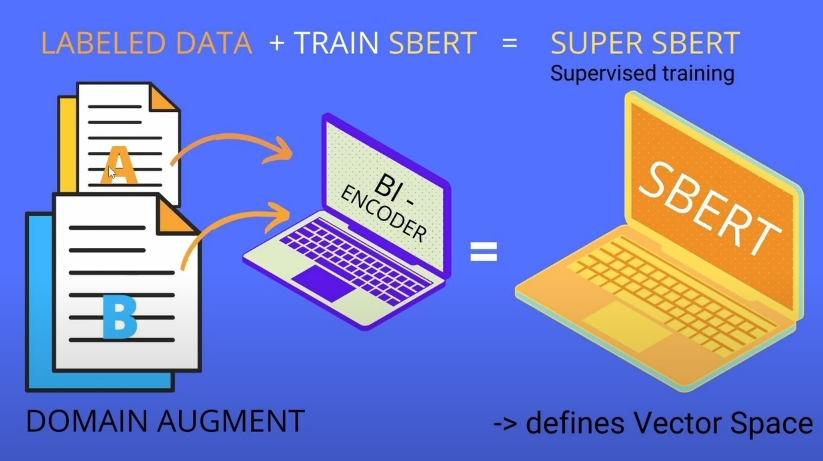

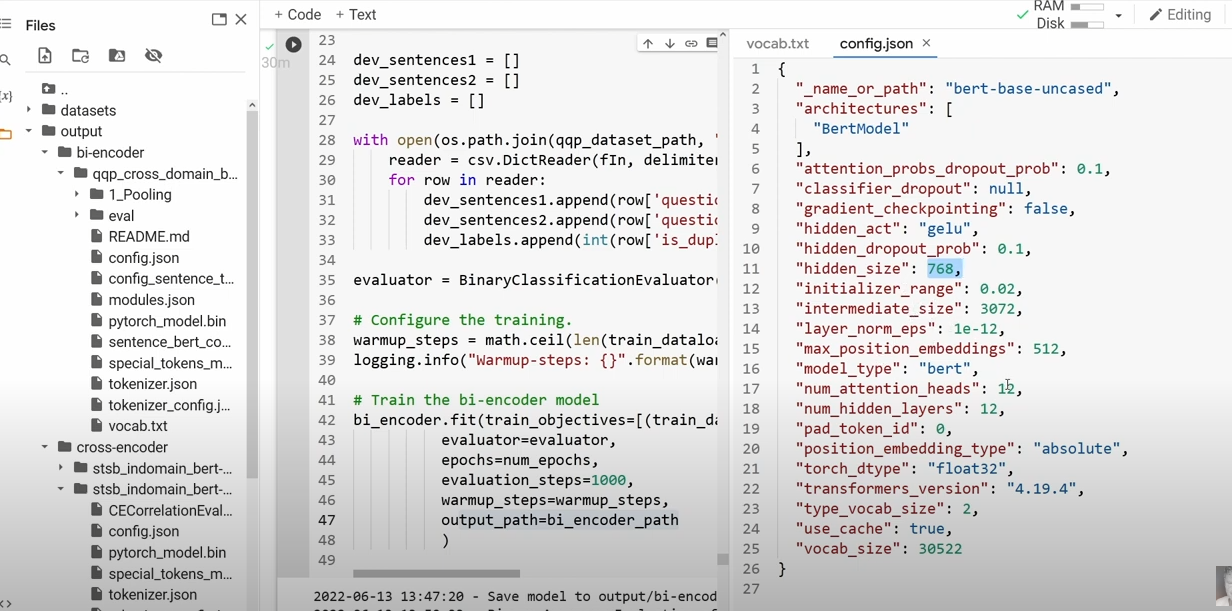

In [135]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [143]:
import shutil
shutil.move("/content/quora_duplicate_questions.tsv","/content/drive/MyDrive/Augmented_Sbert")

'/content/drive/MyDrive/Augmented_Sbert/quora_duplicate_questions.tsv'